<a href="https://colab.research.google.com/github/naavsaa/Hactiv8-Python/blob/master/Hactiv8/PYTN_Assgn_3_Batch_062_Maruli_Asvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Data

In [2]:
from google.colab import drive   
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/Dataset/Bank Marketing Campaign/bank-additional

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bank Marketing Campaign/bank-additional


In [3]:
df= pd.read_csv('bank-additional-full.csv',sep = ';')

In [4]:
df_test= pd.read_csv('bank-additional.csv',sep = ';')

In [5]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)**

# Data Cleansing

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Rename some column
df.rename(columns={'default':'default status','housing':'housing loan','loan':'personal loan','campaign':'number of contact',
                   'pdays':'days after last contact','previous':'previous num of contact','poutcome':'previous outcome','y':'Outcome'}, inplace=True)

df_test.rename(columns={'default':'default status','housing':'housing loan','loan':'personal loan','campaign':'number of contact',
                   'pdays':'days after last contact','previous':'previous num of contact','poutcome':'previous outcome','y':'Outcome'}, inplace=True)

In [9]:
# Grouping in Education column
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
# All basic education like basic 4y,6y and 9y can be groupped as basic education
df['education']=np.where(df['education'] =='basic.9y', 'basic education', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'basic education', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'basic education', df['education'])

df_test['education']=np.where(df_test['education'] =='basic.9y', 'basic education', df_test['education'])
df_test['education']=np.where(df_test['education'] =='basic.6y', 'basic education', df_test['education'])
df_test['education']=np.where(df_test['education'] =='basic.4y', 'basic education', df_test['education'])

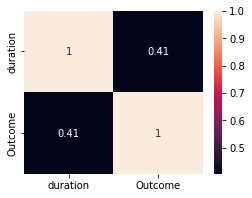

In [11]:
# Check Duration Correlation with Outcome
dfcorr=df.drop(columns={'age','job','marital','education','default status','housing loan','personal loan','contact','month','day_of_week','number of contact',
'days after last contact','previous num of contact','previous outcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'})

dfcorr['Outcome'].replace({'yes':1,'no':0}, inplace=True)

df_corr = dfcorr.corr()
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(df_corr, annot=True)

In [12]:
# Since the column duration is highly affected the outcome, it can potentially impact higly the result of prediction model, thus has to be dropped
df.drop(columns='duration', inplace=True)
df_test.drop(columns='duration', inplace=True)

In [13]:
len(df['job'].value_counts())


12

In [14]:
df['marital'].value_counts()


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

# Data Exploration

**Job**

In [15]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [16]:
# Change the category in Job Column as binary using label encoder or with "replace" for month and days column
labelencoder=LabelEncoder()
df['job']=labelencoder.fit_transform(df['job'])

**Marital**

In [17]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [18]:
df['marital']=labelencoder.fit_transform(df['marital'])

**Education**

In [19]:
df['education'].value_counts()

basic education        12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [20]:
df['education']=labelencoder.fit_transform(df['education'])

**Default Status**

In [21]:
df['default status'].value_counts() 

no         32588
unknown     8597
yes            3
Name: default status, dtype: int64

In [22]:
df['default status']=labelencoder.fit_transform(df['default status'])

**Housing**

In [23]:
df['housing loan'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing loan, dtype: int64

In [24]:
df['housing loan']=labelencoder.fit_transform(df['housing loan'])

**Loan**

In [25]:
df['personal loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: personal loan, dtype: int64

In [26]:
df['personal loan']=labelencoder.fit_transform(df['personal loan'])

**Contact**

In [27]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [28]:
df['contact']=labelencoder.fit_transform(df['contact'])

**Month**

In [29]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [30]:
df["month"].replace({"jan": 1, "feb": 2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}, inplace=True)

In [31]:
#df['month']=labelencoder.fit_transform(df['month'])

**Day of Week**

In [32]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [33]:
df["day_of_week"].replace({"mon": 1, "tue": 2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}, inplace=True)

**Previous Outcome**

In [34]:
df['previous outcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: previous outcome, dtype: int64

In [35]:
df['previous outcome']=labelencoder.fit_transform(df['previous outcome'])

**Outcome**

In [36]:
df['Outcome'].value_counts()

no     36548
yes     4640
Name: Outcome, dtype: int64

In [37]:
df["Outcome"].replace({"no":0, "yes":1}, inplace=True)

In [38]:
df.head()

,age,job,marital,education,default status,housing loan,personal loan,contact,month,day_of_week,number of contact,days after last contact,previous num of contact,previous outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Outcome
0,56,3,1,0,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,2,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,2,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Split Data: Data Train & Data Test

In [39]:
# Define x and y
x = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, df.columns == 'Outcome']

In [40]:
# Data Split into Data Train and Data Test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [41]:
# Standarization
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [42]:
x_train2 = x_train
x_test2=x_test
y_train2 = y_train
y_test2 = y_test

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Stats Summary
logit_regression=sm.Logit(y_train,x_train)
stats_regression=logit_regression.fit()
print(stats_regression.summary())

Optimization terminated successfully.
         Current function value: 0.644713
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32931
Method:                           MLE   Df Model:                           18
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                 -0.8366
Time:                        09:43:05   Log-Likelihood:                -21243.
converged:                       True   LL-Null:                       -11566.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0293      0.013      2.203      0.028       0.003       0.055
x2             0.0095      0.

In [45]:
model_regression=LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model_regression.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

**Model Score**

In [46]:
print ("Model Score Data Train=", model_regression.score(x_train,y_train))

Model Score Data Train= 0.9001517450682853


**Model Evaluation**

In [47]:
# Model Prediction
y_predict_regg = model_regression.predict(x_test)

In [48]:
print ("Model Score Data Test=", model_regression.score(x_test,y_test))

Model Score Data Test= 0.8982762806506434


In [49]:
print("Model Accuracy Log Regg=", metrics.accuracy_score(y_test, y_predict_regg))

Model Accuracy Log Regg= 0.8982762806506434


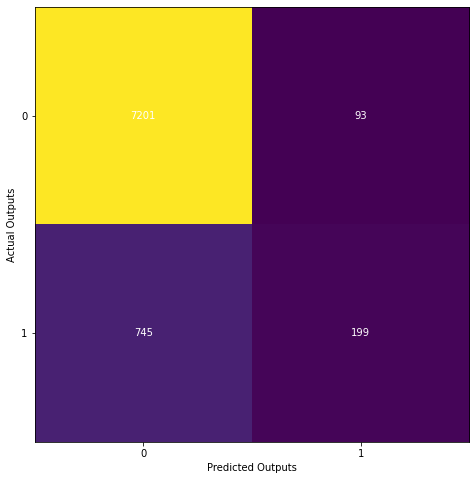

In [50]:
#Confusion Matrix
cm_regression= confusion_matrix(y_test, y_predict_regg)
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_regression)
ax.grid(False)
ax.set_xlabel("Predicted Outputs", color='black')
ax.set_ylabel("Actual Outputs", color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cm_regression[i,j],ha='center',va='center',color='white')

plt.show()

In [51]:
#Classification Report
print(classification_report(y_test, y_predict_regg))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7294
           1       0.68      0.21      0.32       944

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



# K-Nearest Neighbor

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict_knn= knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Model Evaluation**

In [54]:
print("Model Accuracy KNN=", metrics.accuracy_score(y_test, y_predict_knn))

Model Accuracy KNN= 0.8912357368293276


# Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
model_nb = GaussianNB()

In [57]:
model_nb.fit(x_train,y_train)
y_predict_nb = model_nb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
print ("Accuracy of Naive Bayer Model = ", metrics.accuracy_score(y_test, y_predict_nb))

Accuracy of Naive Bayer Model =  0.8373391599902889


# Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

Feature = All Column except Outcome
Target =  Column Outcome (0= No, and 1 = Yes)

In [60]:
tree_clf= DecisionTreeClassifier(random_state=123, criterion='entropy', max_depth = 5)
tree_clf = tree_clf.fit(x_train, y_train)
y_predict_tree = tree_clf.predict(x_test)

In [61]:
print ("Accuracy of Decision Tree Model = ", metrics.accuracy_score(y_test, y_predict_tree))

Accuracy of Decision Tree Model =  0.898154891964069


**Visualization**

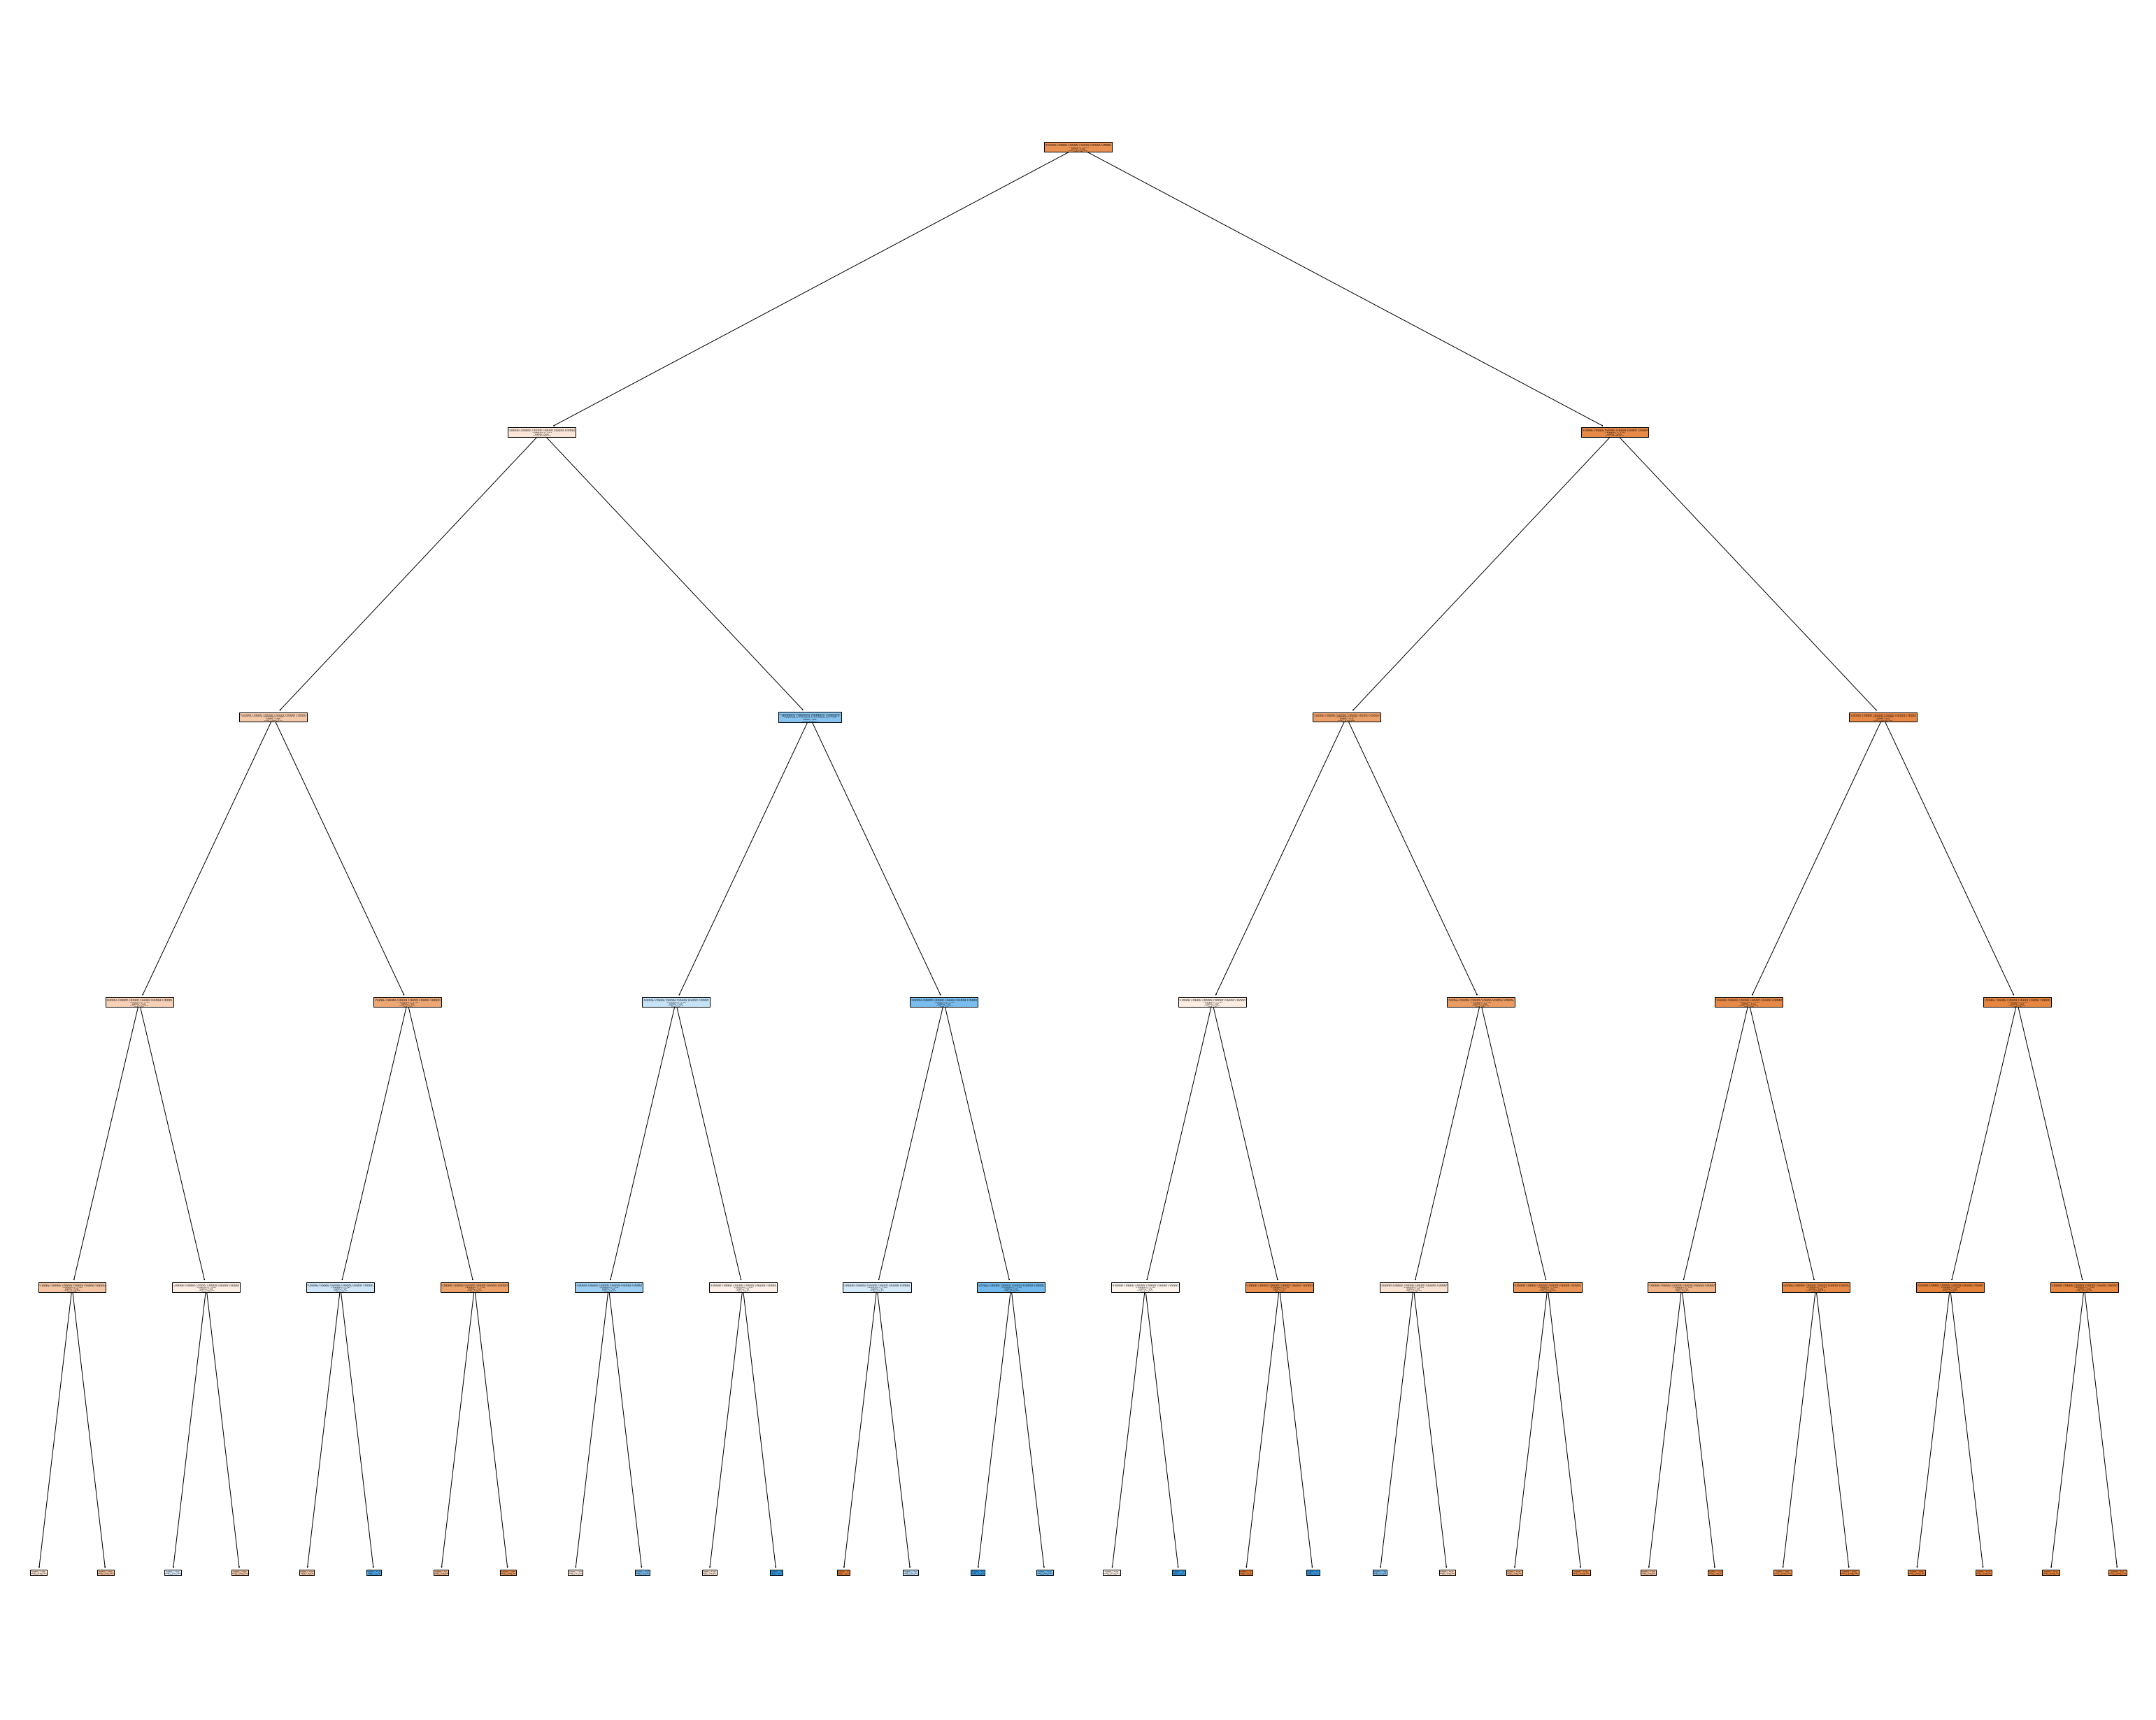

In [62]:
# Visualize the Decision Tree
fig = plt.figure(figsize=(55,45))
_ = tree.plot_tree(tree_clf, 
                   feature_names=(x_train),
                   class_names=['yes','no'],
                   filled=True)

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [65]:
y_predict_RF = rf_clf.predict(x_test)

In [66]:
print ("Accuracy of Random Forest = ", metrics.accuracy_score(y_test, y_predict_RF))

Accuracy of Random Forest =  0.8935421218742413


# SVM

In [67]:
from sklearn import svm

In [68]:
svm_clf= svm.SVC(kernel='linear') # Linear Kernel
svm_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [69]:
y_predict_svm = svm_clf.predict (x_test)

In [70]:
print ("Accuracy of SVM = ", metrics.accuracy_score(y_test, y_predict_svm))

Accuracy of SVM =  0.8973051711580481


# Summary of Accuracy

In [71]:
print("Model Accuracy Logistic Reggression=", metrics.accuracy_score(y_test, y_predict_regg))
print("Model Accuracy KNN=", metrics.accuracy_score(y_test, y_predict_knn))
print ("Accuracy of Naive Bayer Model = ", metrics.accuracy_score(y_test, y_predict_nb))
print ("Accuracy of Decision Tree Model = ", metrics.accuracy_score(y_test, y_predict_tree))
print ("Accuracy of Random Forest = ", metrics.accuracy_score(y_test, y_predict_RF))
print ("Accuracy of SVM = ", metrics.accuracy_score(y_test, y_predict_svm))

Model Accuracy Logistic Reggression= 0.8982762806506434
Model Accuracy KNN= 0.8912357368293276
Accuracy of Naive Bayer Model =  0.8373391599902889
Accuracy of Decision Tree Model =  0.898154891964069
Accuracy of Random Forest =  0.8935421218742413
Accuracy of SVM =  0.8973051711580481


# Summary of Classification Report

In [72]:
print("Classification Report for Log Regression Model")
print(classification_report(y_test, y_predict_regg))

Classification Report for Log Regression Model
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7294
           1       0.68      0.21      0.32       944

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [73]:
print("Classification Report for KNN")
print(classification_report(y_test, y_predict_knn))

Classification Report for KNN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.55      0.28      0.37       944

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [74]:
print("Classification Report for Naive Bayer Model")
print(classification_report(y_test, y_predict_nb))

Classification Report for Naive Bayer Model
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7294
           1       0.36      0.51      0.42       944

    accuracy                           0.84      8238
   macro avg       0.64      0.70      0.66      8238
weighted avg       0.87      0.84      0.85      8238



In [75]:
print("Classification Report for Decision Tree Model")
print(classification_report(y_test, y_predict_tree))

Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7294
           1       0.66      0.23      0.34       944

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [76]:
print("Classification Report for Random Forest")
print(classification_report(y_test, y_predict_RF))

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.58      0.27      0.37       944

    accuracy                           0.89      8238
   macro avg       0.74      0.62      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [77]:
print("Classification Report for SVM")
print(classification_report(y_test, y_predict_svm))

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.65      0.22      0.33       944

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



**From Summary of Accuracy, the best Model is: Logistic Regression and Decision Tree with Accuracy 0,9. Both also has good precision**